In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
exps=['historical0p2','historical0p4','historical0p7','historical1p0','historical1p5']
exp_names=['0.2','0.4','0.7','1.0','1.5']
runs=['r1i1p1f1','r2i1p1f1','r3i1p1f1','r4i1p1f1','r5i1p1f1']
smurphs_cmap= [(255/255, 0 , 0),(255/255 ,165/255,   0),(190/255, 190/255, 190/255),(0   ,0 ,255/255),(160 /255, 32/255 ,240/255)]

In [3]:
exp=exps[0]
run=runs[0]
ds_test=xr.open_dataset('~/smurphs_ensemble/SMURPHS_coupled_ensemble/{}/{}/Amon/siconca/gn/v20190213/siconca_Amon_HadGEM3-GC3.1_{}_{}_gn_185001-201412.nc'.format(exp,run,exp,run))

In [4]:
ds_test

<xarray.Dataset>
Dimensions:                  (bnds: 2, latitude: 144, longitude: 192, time: 1980)
Coordinates:
  * time                     (time) object 1850-01-16 00:00:00 ... 2014-12-16...
  * latitude                 (latitude) float32 -89.38 -88.12 ... 88.12 89.38
  * longitude                (longitude) float32 0.9375 2.812 ... 357.2 359.1
    forecast_period          (time) timedelta64[ns] ...
    forecast_reference_time  object ...
Dimensions without coordinates: bnds
Data variables:
    latitude_longitude       int32 ...
    time_bnds                (time, bnds) object ...
    forecast_period_bnds     (time, bnds) float64 ...
    siconca                  (time, latitude, longitude) float32 ...
Attributes: (12/15)
    source:          Data from Met Office Unified Model
    um_version:      10.7
    Conventions:     CF-1.5
    history:         Thu May  2 16:30:59 2019: ncrename -O -v .sea_ice_area_f...
    NCO:             4.7.3
    model:           HadGEM3-GC3.1
    ...              ...
    scaling_factor:  0.2
    project_id:      SMURPHS
    documentation:   https://docs.google.com/document/d/1XdqBYO-HWsp0gWYAXHGn...
    references:      For the SMURPHS ensemble, see Dittus et al. (in prep.) a...
    institution:     University of Reading, Reading, RG6 6BB, UK
    contact:         a.j.dittus@reading.ac.uk

In [3]:
si=[[],[],[],[],[]]
for ie,exp in enumerate(exps):    
    for run in runs:
        ds=xr.open_dataset('~/smurphs_ensemble/SMURPHS_coupled_ensemble/{}/{}/Amon/siconca/gn/v20190213/siconca_Amon_HadGEM3-GC3.1_{}_{}_gn_185001-201412.nc'.format(exp,run,exp,run))
        si[ie].append(ds.siconca)
                

In [4]:
si_all=xr.combine_nested(si,concat_dim=['exp','run'],coords='minimal')

In [5]:
si_all['run']=(('run'),runs)
si_all['exp']=(('exp'),exps)
si_all

<xarray.DataArray 'siconca' (run: 5, exp: 5, time: 1980, latitude: 144, longitude: 192)>
array([[[[[       nan,        nan,        nan, ...,        nan,
                  nan,        nan],
          [       nan,        nan,        nan, ...,        nan,
                  nan,        nan],
          [       nan,        nan,        nan, ...,        nan,
                  nan,        nan],
          ...,
          [0.9983132 , 0.9983798 , 0.99831307, ..., 0.9981958 ,
           0.9982045 , 0.9982382 ],
          [0.99824876, 0.9983141 , 0.99835086, ..., 0.9982802 ,
           0.9982028 , 0.9981865 ],
          [0.9987669 , 0.9987669 , 0.9987669 , ..., 0.99876684,
           0.99876684, 0.9987669 ]],

         [[       nan,        nan,        nan, ...,        nan,
                  nan,        nan],
          [       nan,        nan,        nan, ...,        nan,
                  nan,        nan],
          [       nan,        nan,        nan, ...,        nan,
                  nan,        nan],
...
          [0.99799335, 0.9980833 , 0.9980705 , ..., 0.9977617 ,
           0.9977752 , 0.9978818 ],
          [0.9979869 , 0.99797314, 0.9979385 , ..., 0.99815696,
           0.9980935 , 0.9980047 ],
          [0.9970244 , 0.9970245 , 0.9970245 , ..., 0.9970244 ,
           0.9970244 , 0.9970244 ]],

         [[       nan,        nan,        nan, ...,        nan,
                  nan,        nan],
          [       nan,        nan,        nan, ...,        nan,
                  nan,        nan],
          [       nan,        nan,        nan, ...,        nan,
                  nan,        nan],
          ...,
          [0.9972229 , 0.9973614 , 0.9974044 , ..., 0.997195  ,
           0.997134  , 0.99709785],
          [0.99713415, 0.9971364 , 0.9971349 , ..., 0.9971129 ,
           0.9971487 , 0.9971336 ],
          [0.99698406, 0.99698406, 0.99698406, ..., 0.996984  ,
           0.996984  , 0.99698406]]]]], dtype=float32)
Coordinates:
  * time                     (time) object 1850-01-16 00:00:00 ... 2014-12-16...
  * latitude                 (latitude) float32 -89.38 -88.12 ... 88.12 89.38
  * longitude                (longitude) float32 0.9375 2.812 ... 357.2 359.1
    forecast_period          (time) timedelta64[ns] 15 days ... 59385 days
    forecast_reference_time  object 1850-01-01 00:00:00
  * run                      (run) <U8 'r1i1p1f1' 'r2i1p1f1' ... 'r5i1p1f1'
  * exp                      (exp) <U13 'historical0p2' ... 'historical1p5'

In [6]:
si_so = si_all.where(si_all.latitude<-40,drop=True)

In [7]:
areacella=xr.open_dataset('/gws/nopw/j04/smurphs/E/adittus/areacella.nc')

In [8]:
areacella.cell_area

<xarray.DataArray 'cell_area' (latitude: 144, longitude: 192)>
array([[3.161191e+08, 3.161191e+08, 3.161191e+08, ..., 3.161191e+08,
        3.161191e+08, 3.161191e+08],
       [9.482093e+08, 9.482093e+08, 9.482093e+08, ..., 9.482093e+08,
        9.482093e+08, 9.482093e+08],
       [1.579848e+09, 1.579848e+09, 1.579848e+09, ..., 1.579848e+09,
        1.579848e+09, 1.579848e+09],
       ...,
       [1.579848e+09, 1.579848e+09, 1.579848e+09, ..., 1.579848e+09,
        1.579848e+09, 1.579848e+09],
       [9.482093e+08, 9.482093e+08, 9.482093e+08, ..., 9.482093e+08,
        9.482093e+08, 9.482093e+08],
       [3.161191e+08, 3.161191e+08, 3.161191e+08, ..., 3.161191e+08,
        3.161191e+08, 3.161191e+08]])
Coordinates:
  * latitude   (latitude) float32 -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * longitude  (longitude) float32 0.9375 2.812 4.688 ... 355.3 357.2 359.1
Attributes:
    grid_mapping:  latitude_longitude

In [9]:
siarea=areacella.cell_area.where(si_so>0.15)/1e6

In [10]:
siarea.attrs={'long_name':'Sea Ice Area (Southern Hemisphere)','units':'km^2'}

In [11]:
siarea.name='siarea_sh'

In [12]:
siarea_sum=siarea.sum(dim=['latitude','longitude'])

In [13]:
siarea_sum.to_netcdf('SIA_SH.nc')

In [14]:
siarea_march=siarea_sum.where(siarea_sum.time.dt.month==3,drop=True)

In [21]:
siarea_sep=siarea_sum.where(siarea_sum.time.dt.month==9,drop=True)

In [17]:
tt=siarea_march.time.sel(time=slice('1900-01-01',None))
tt_index=tt.dt.year+(tt.dt.dayofyear-1)/365.25

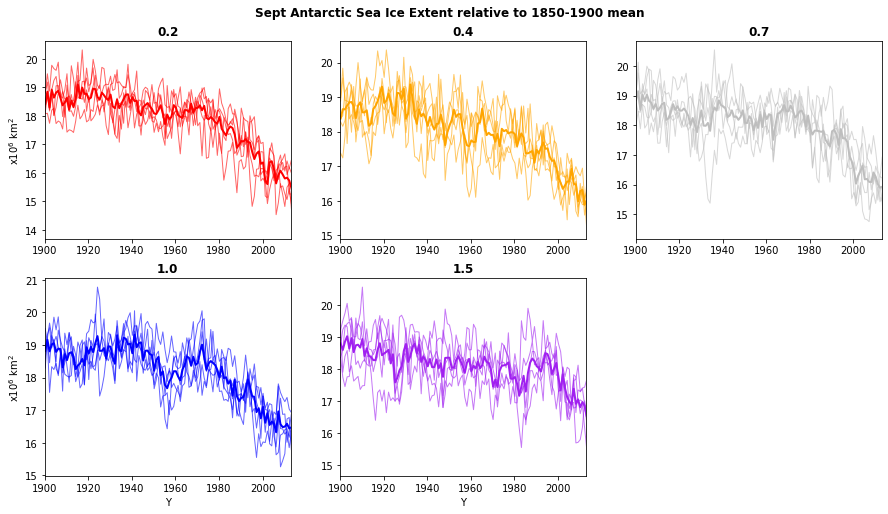

In [22]:
#dplot=siarea_march-siarea_march.sel(time=slice('1850-01-01','1900-01-01')).mean(dim=['time','run'])
dplot=siarea_sep.sel(time=slice('1900-01-01',None))
dplot['time']=tt_index

%matplotlib inline
fig=plt.figure(figsize=[15,8])
cmap=smurphs_cmap
pp=[]
for ie,exp in enumerate(exps):
    ax=plt.subplot(2,3,ie+1)
    pp.append((dplot/1e6).sel(exp=exp).plot(x='time',hue='run',color=cmap[ie],linewidth=1,add_legend=False,alpha=0.6)[0])
    (dplot/1e6).mean(dim='run').sel(exp=exp).plot(x='time',color=cmap[ie],linewidth=2,add_legend=False)
  #  plt.axhline(0,color='k')
    plt.xlim([1900,2013])
   # plt.ylim([-4,7])
    if np.mod(ie,3)==0:
        plt.ylabel('x10$^6$ km$^2$')
    else:
        plt.ylabel('')
    if ie>2:
        plt.xlabel('Y')
    else:
        plt.xlabel('')
    plt.title(exp_names[ie],fontweight='bold')
plt.suptitle('Sept Antarctic Sea Ice Extent relative to 1850-1900 mean',fontweight='bold',y=0.94)
plt.savefig('./Sept_SIE_byexp.png',bbox_inches='tight')
plt.savefig('./Sept_SIE_byexp.pdf',bbox_inches='tight')

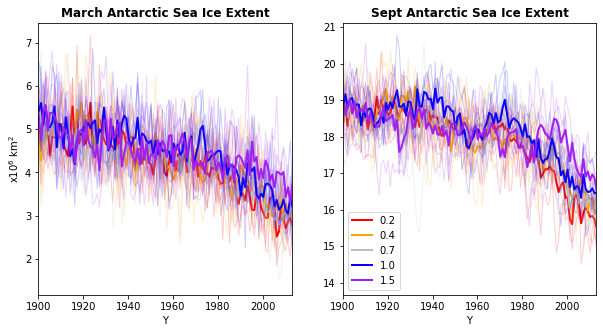

In [37]:
#dplot=siarea_march-siarea_march.sel(time=slice('1850-01-01','1900-01-01')).mean(dim=['run','exp'])
dplot=siarea_march.sel(time=slice('1900-01-01',None))
dplot['time']=tt_index
dplot2=siarea_sep.sel(time=slice('1900-01-01',None))
dplot2['time']=tt_index

%matplotlib inline
fig=plt.figure(figsize=[10,5])
cmap=smurphs_cmap
pp=[]
ax=fig.add_subplot(1,2,1)
for ie,exp in enumerate(exps):
    (dplot/1e6).sel(exp=exp).plot(ax=ax,x='time',hue='run',color=cmap[ie],linewidth=1,add_legend=False,alpha=0.2)
    pp.append((dplot/1e6).mean(dim='run').sel(exp=exp).plot(x='time',color=cmap[ie],linewidth=2,add_legend=False)[0])
#plt.axhline(0,color='k')
plt.xlim([1900,2013])
plt.ylabel('x10$^6$ km$^2$')
plt.xlabel('Y')
plt.title('March Antarctic Sea Ice Extent',fontweight='bold')
ax=fig.add_subplot(1,2,2)
for ie,exp in enumerate(exps):
    (dplot2/1e6).sel(exp=exp).plot(ax=ax,x='time',hue='run',color=cmap[ie],linewidth=1,add_legend=False,alpha=0.2)
    pp.append((dplot2/1e6).mean(dim='run').sel(exp=exp).plot(x='time',color=cmap[ie],linewidth=2,add_legend=False)[0])
#plt.axhline(0,color='k')
plt.xlim([1900,2013])
plt.ylabel('')
plt.xlabel('Y')
plt.legend(pp,exp_names)
plt.title('Sept Antarctic Sea Ice Extent',fontweight='bold')

plt.savefig('./SIE_all.png',bbox_inches='tight')
plt.savefig('./SIE_all.pdf',bbox_inches='tight')

In [1]:
!jupyter nbconvert --to script SIE.ipynb

[NbConvertApp] Converting notebook SIE.ipynb to script
[NbConvertApp] Writing 4504 bytes to SIE.py
